# Analyzing the different regions and their correlations

Useful links:

* https://en.wikibooks.org/wiki/Introducing_Julia/DataFrames

In [1]:
# Packages we will use throughout this notebook (only first time)
Pkg.add("UMAP")
Pkg.add("Makie")
Pkg.add("XLSX")
Pkg.add("VegaDatasets")
Pkg.add("MultivariateStats")
Pkg.add("RDatasets")
Pkg.add("StatsBase")
Pkg.add("Statistics")
Pkg.add("LinearAlgebra")
Pkg.add("Plots")
Pkg.add("ScikitLearn")
Pkg.add("MLBase")
Pkg.add("Distances")

LoadError: UndefVarError: Pkg not defined

In [1]:
# Packages we will use throughout this notebook
using UMAP
using Makie
using XLSX
using VegaDatasets
using DataFrames
using MultivariateStats
using RDatasets
using StatsBase
using Statistics
using LinearAlgebra
#using Plots
using ScikitLearn
using MLBase
using Distances

In [3]:
using PlotlyJS

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-18250503110129617273\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-10842837970160443395\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-18250503110129617273\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [2]:
using DataFrames

In [3]:
using CSV

In [4]:
features = DataFrame(CSV.File("data/Kidney_Sample_Annotations.txt"))

,SlideName,ScanName,ROILabel,SegmentLabel,SegmentDisplayName
,String,String,Int64,String,String
1,disease3,disease3_scan,7,Geometric Segment,disease3_scan | 007 | Geometric Segment
2,disease3,disease3_scan,8,Geometric Segment,disease3_scan | 008 | Geometric Segment
3,disease3,disease3_scan,9,Geometric Segment,disease3_scan | 009 | Geometric Segment
4,disease3,disease3_scan,10,Geometric Segment,disease3_scan | 010 | Geometric Segment
5,disease3,disease3_scan,11,Geometric Segment,disease3_scan | 011 | Geometric Segment
6,disease3,disease3_scan,12,Geometric Segment,disease3_scan | 012 | Geometric Segment
7,disease3,disease3_scan,13,Geometric Segment,disease3_scan | 013 | Geometric Segment
8,disease3,disease3_scan,14,Geometric Segment,disease3_scan | 014 | Geometric Segment
9,disease3,disease3_scan,15,Geometric Segment,disease3_scan | 015 | Geometric Segment


In [5]:
typeof(features[1,"SegmentDisplayName"])

String

In [6]:
features[!,["disease_status","region","pathology"]]

,disease_status,region,pathology
,String,String,String?
1,DKD,glomerulus,abnormal
2,DKD,glomerulus,abnormal
3,DKD,glomerulus,abnormal
4,DKD,glomerulus,abnormal
5,DKD,glomerulus,abnormal
6,DKD,glomerulus,abnormal
7,DKD,glomerulus,abnormal
8,DKD,glomerulus,abnormal
9,DKD,glomerulus,abnormal


In [16]:
?Dict

search: Dict predict predict! predict_dist predict_proba predict_log_proba



```
Dict([itr])
```

`Dict{K,V}()` constructs a hash table with keys of type `K` and values of type `V`. Keys are compared with [`isequal`](@ref) and hashed with [`hash`](@ref).

Given a single iterable argument, constructs a [`Dict`](@ref) whose key-value pairs are taken from 2-tuples `(key,value)` generated by the argument.

# Examples

```jldoctest
julia> Dict([("A", 1), ("B", 2)])
Dict{String, Int64} with 2 entries:
  "B" => 2
  "A" => 1
```

Alternatively, a sequence of pair arguments may be passed.

```jldoctest
julia> Dict("A"=>1, "B"=>2)
Dict{String, Int64} with 2 entries:
  "B" => 2
  "A" => 1
```


In [23]:
structuresDict = Dict("abnormal"=>"Glom (Abnormal)","healthy"=>"Glom (Abnormal)"," PanCK" => "Tub. Distal", " neg" => "Tub. Proximal")

Dict{String, String} with 4 entries:
  " PanCK"   => "Tub. Distal"
  "healthy"  => "Glom (Abnormal)"
  " neg"     => "Tub. Proximal"
  "abnormal" => "Glom (Abnormal)"

In [24]:
comprehensiveStates=[structuresDict[ismissing(row.pathology) ? split(row["SegmentDisplayName"],"|")[3] : row.pathology] for row in eachrow(features)]

231-element Vector{String}:
 "Glom (Abnormal)"
 "Glom (Abnormal)"
 "Glom (Abnormal)"
 "Glom (Abnormal)"
 "Glom (Abnormal)"
 "Glom (Abnormal)"
 "Glom (Abnormal)"
 "Glom (Abnormal)"
 "Glom (Abnormal)"
 "Glom (Abnormal)"
 "Glom (Abnormal)"
 "Glom (Abnormal)"
 "Glom (Abnormal)"
 ⋮
 "Tub. Distal"
 "Tub. Proximal"
 "Tub. Distal"
 "Tub. Proximal"
 "Tub. Distal"
 "Tub. Proximal"
 "Tub. Distal"
 "Tub. Proximal"
 "Tub. Distal"
 "Tub. Proximal"
 "Glom (Abnormal)"
 "Glom (Abnormal)"

In [31]:
first(values(structuresDict))

"Tub. Distal"

In [8]:
TCM = DataFrame(CSV.File("data/Kidney_Raw_TargetCountMatrix.txt"))

,TargetName,disease3_scan | 001 | PanCK,disease3_scan | 001 | neg,disease3_scan | 002 | PanCK
,String,Float64,Float64,Float64
1,PADI2,15.0,35.0,36.0
2,CYP24A1,23.0,32.0,23.0
3,SUPT16H,35.0,66.0,46.0
4,ZMIZ2,51.0,81.0,87.0
5,SPAG9,48.0,65.0,46.0
6,AMELX,21.0,30.0,31.0
7,VPS33B,44.0,55.0,32.0
8,DDX58,29.0,48.0,49.0
9,MAK,25.0,40.0,28.0


In [9]:
PCM = DataFrame(CSV.File("data/Kidney_Q3Norm_TargetCountMatrix.txt"))

,TargetName,disease3_scan | 001 | PanCK,disease3_scan | 001 | neg,disease3_scan | 002 | PanCK
,String,Float64,Float64,Float64
1,PADI2,6.01291,8.6185,11.7082
2,CYP24A1,9.2198,7.87978,7.48021
3,SUPT16H,14.0301,16.252,14.9604
4,ZMIZ2,20.4439,19.9457,28.2947
5,SPAG9,19.2413,16.0058,14.9604
6,AMELX,8.41807,7.38729,10.082
7,VPS33B,17.6379,13.5434,10.4073
8,DDX58,11.625,11.8197,15.9361
9,CDV3,22.0473,19.6994,20.164


In [10]:
M = Matrix(PCM[:,2:end])

16084×231 Matrix{Float64}:
  6.01291   8.6185   11.7082   …   4.30925  17.237    8.6185   8.6185
  9.2198    7.87978   7.48021     12.9278    8.6185  25.8555   8.6185
 14.0301   16.252    14.9604       4.30925  17.237    8.6185   8.6185
 20.4439   19.9457   28.2947       8.6185   17.237   25.8555  17.237
 19.2413   16.0058   14.9604      21.5463   34.474   51.711   17.237
  8.41807   7.38729  10.082    …   4.30925  17.237   17.237    8.6185
 17.6379   13.5434   10.4073       4.30925   8.6185   8.6185   8.6185
 11.625    11.8197   15.9361      12.9278    8.6185  25.8555   8.6185
 22.0473   19.6994   20.164        8.6185   25.8555  60.3295  51.711
 14.8318   13.2971   14.9604       4.30925  17.237    8.6185  17.237
 14.431    15.5133   14.9604   …  12.9278   17.237    8.6185   8.6185
 18.8405   17.4833   20.164       17.237     8.6185   8.6185   8.6185
 11.625    10.5884   10.4073       4.30925   8.6185  17.237    8.6185
  ⋮                            ⋱                               ⋮
 1

In [11]:
data = M
data = (data .- mean(data,dims = 2))./ std(data,dims=2)

16084×231 Matrix{Float64}:
 -0.572635     0.130916    0.96517    …   0.130916      0.130916
  0.0609006   -0.119159   -0.172848       2.29625      -0.0198952
 -0.390533     0.0750558  -0.195594      -1.52451      -1.52451
 -0.419471    -0.495582    0.779878       0.407248     -0.909379
 -0.983715    -1.30961    -1.4149         2.28673      -1.18559
  0.00936344  -0.295399    0.501327   …   2.61677       0.0686227
  1.60162      0.571413   -0.217658      -0.66772      -0.66772
 -0.653512    -0.614887    0.201727       2.16953      -1.24993
 -0.693934    -0.931553   -0.884533       3.18043       2.30819
 -0.00624055  -0.358182    0.0232448     -1.43108       0.545309
 -0.425986    -0.227344   -0.328817   …  -1.49276      -1.49276
  0.0135777   -0.187312    0.209494      -1.49945      -1.49945
  0.873615     0.572578    0.519952       2.50354       0.000440403
  ⋮                                   ⋱                 ⋮
  2.63243      2.17797     0.47894       -0.000626416  -0.000626416
 -0.

In [12]:
p = fit(PCA,data,maxoutdim=2)

PCA(indim = 16084, outdim = 2, principalratio = 0.16156114406485683)

In [13]:
P = projection(p)

16084×2 Matrix{Float64}:
  0.00711522   -0.00291269
  6.08004e-5   -0.011658
 -0.00522145    0.00699575
 -0.0037563    -0.00448816
 -0.0087203    -0.00334342
  0.0031281    -0.00774205
  0.00821834    0.000581944
  0.00596965    0.00832335
 -0.014032      0.0031605
  0.000241092   0.00825613
 -0.00424247    0.00783928
 -0.0112326    -0.00824861
  0.00262046   -0.00448795
  ⋮            
  0.0105557    -0.000113116
  0.00787844   -0.00638185
 -0.0083502     0.00167438
  0.0067243     0.0196555
 -0.00427972   -0.00315404
 -0.0091326     0.00315792
  0.00274058   -0.00828522
 -0.00493972   -0.0139812
  0.0049015    -0.0127777
 -0.013343     -0.0182566
  0.00675564    0.00636785
  4.17318e-5    0.00568039

In [14]:
Yte = MultivariateStats.transform(p, data) #notice that Yte[:,1] is the same as P'*(data[1,:]-mean(p))

2×231 Matrix{Float64}:
  46.3309   79.6646   29.9858   73.4009  …   40.0674   55.2621   49.9721
 -41.4498  -44.9247  -39.806   -40.8212     -14.8971  -37.1187  -17.6628

In [31]:
CSV.write("PCA_matrix.txt",Tables.table(Yte))

"PCA_matrix.txt"

In [35]:
Yte=Matrix(CSV.read("PCA_matrix.txt",DataFrame))

2×231 Matrix{Float64}:
  46.3309   79.6646   29.9858   73.4009  …   40.0674   55.2621   49.9721
 -41.4498  -44.9247  -39.806   -40.8212     -14.8971  -37.1187  -17.6628

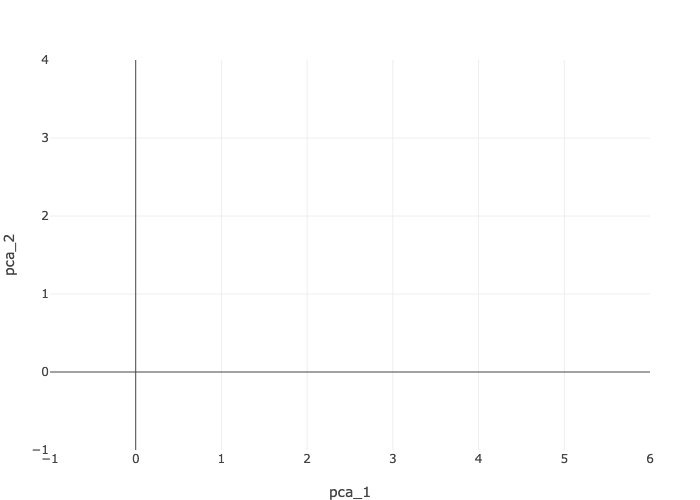

In [17]:
patientState="normal"
PlotlyJS.plot(
        Yte[1,features[!, "disease_status"] .== patientState[1]],
        Yte[2,features[!, "disease_status"] .== patientState[1]],
        Layout(
          #  xaxis_type = xaxis_type == "Linear" ? "linear" : "log",
            xaxis_title = "pca_1",
            yaxis_title = "pca_2",
           # yaxis_type = yaxis_type == "Linear" ? "linear" : "log",
            hovermode = "closest",
            height = 450,
        ),
        kind = "scatter",
        mode = "markers",
        marker_size = 15,
        marker_opacity = 0.5,
        marker_line_width = 0.5,
        marker_line_color = "white",
)

In [20]:
using WebIO
WebIO.install_jupyter_labextension()

┌ Info: Using default Jupyter executable at `/Library/Frameworks/Python.framework/Versions/3.8/bin/jupyter`; to use a different executable, see the documentation by running `?WebIO.install_jupyter_labextension`.
└ @ WebIO /Users/urieluval/.julia/packages/WebIO/Fy9h1/deps/jupyter.jl:198


An error occured.
ValueError: No linked package for @webio/webio
See the log file for details:  /var/folders/1j/bghpxnvd61zffqv6ytzxqgg40000gn/T/jupyterlab-debug-quncc9wq.log
An error occured.
ValueError: Please install Node.js and npm before continuing installation. You may be able to install Node.js from your package manager, from conda, or directly from the Node.js website (https://nodejs.org).
See the log file for details:  /var/folders/1j/bghpxnvd61zffqv6ytzxqgg40000gn/T/jupyterlab-debug-qdy0nn_8.log
An error occured.
ValueError: Please install Node.js and npm before continuing installation. You may be able to install Node.js from your package manager, from conda, or directly from the Node.js website (https://nodejs.org).
See the log file for details:  /var/folders/1j/bghpxnvd61zffqv6ytzxqgg40000gn/T/jupyterlab-debug-w0w3y2v0.log


LoadError: failed process: Process(`[4m/Library/Frameworks/Python.framework/Versions/3.8/bin/jupyter[24m [4mlabextension[24m [4minstall[24m [4m--no-build[24m [4m@webio/jupyter-lab-provider@0.8.15[24m`, ProcessExited(1)) [1]


In [19]:
import Pkg; Pkg.add("WebIO")

    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
    Updating `~/.julia/environments/v1.6/Project.toml`
  [0f1e0344] + WebIO v0.8.15
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
Precompiling project...
  ✓ Libepoxy_jll
  ✓ Qt5Base_jll
  ✓ GR_jll
  ✓ GR
  ✓ GTK3_jll
  ✓ Gtk
  ✓ InspectDR
  ✓ Plots
8 dependencies successfully precompiled in 70 seconds (286 already precompiled)


In [ ]:
#To plot we need to know which points are what...
#Preliminarily, we can use this:
segmentDisplayNames=features[!,r"SegmentDi."]

In [ ]:
healthy=[!occursin(r"disease.",seg) for seg in segmentDisplayNames[!,1]];

In [ ]:
glomeruli = [occursin(r".Geo.",seg) for seg in segmentDisplayNames[!,1]];
distTub = [occursin(r".Pan.",seg) for seg in segmentDisplayNames[!,1]];
proxTub = [occursin(r".neg",seg) for seg in segmentDisplayNames[!,1]];

In [ ]:
Plots.scatter(Yte[1,healthy.& glomeruli],Yte[2,healthy.& glomeruli],color=1,label="Glomeruli (Healthy)",marker=:o)
Plots.xlabel!("pca component1")
Plots.ylabel!("pca component2")
Plots.scatter!(Yte[1,.!(healthy).& glomeruli],Yte[2,.!(healthy).& glomeruli],color=1,label="Glom (DKD)",marker=:d)
Plots.scatter!(Yte[1,healthy.& distTub],Yte[2,healthy.& distTub],color=2,label="Distub",marker=:o)
Plots.scatter!(Yte[1,.!(healthy).& distTub],Yte[2,.!(healthy).& distTub],color=2,label=:none, marker=:d)
Plots.scatter!(Yte[1,healthy.& proxTub],Yte[2,healthy.& proxTub],color=3,label="Proxtub",marker=:o)
Plots.scatter!(Yte[1,.!(healthy).& proxTub],Yte[2,.!(healthy).& proxTub],color=3,label=:none, marker=:d)

In [ ]:
a=[stat for stat in unique(features[!,"disease_status"])]

In [ ]:
@show a

In [ ]:
Plots.png("glomAndTubs.png")

In [ ]:
glomPath = features[!,"pathology"];
glomPath = [ ismissing(x) ? "a" : x for x in glomPath ]

In [ ]:
features.SegmentDisplayName

In [ ]:
Plots.scatter(Yte[1,glomPath.=="healthy"],Yte[2,glomPath.=="healthy"],color=1,label="healthy Glomeruli",marker=:o)
Plots.xlabel!("pca component1")
Plots.ylabel!("pca component2")
Plots.scatter!(Yte[1,glomPath.=="abnormal"],Yte[2,glomPath.=="abnormal"],color=1,label="abnormal Glom",marker=:x)


In [ ]:
Plots.scatter(Yte[1, .!(healthy) .& (glomPath.=="healthy")],Yte[2,.!(healthy) .& (glomPath.=="healthy")],color=1,label="healthy Glomeruli(DKD)",marker=:o)
Plots.scatter!(Yte[1,.!(healthy) .& (glomPath.=="abnormal")],Yte[2,.!(healthy) .& (glomPath.=="abnormal")],color=1,label="abnormal Glom(DKD)",marker=:x)

Plots.scatter!(Yte[1, (healthy) .& (glomPath.=="healthy")],Yte[2,(healthy) .& (glomPath.=="healthy")],color=2,label="healthy Glomeruli(Ctrl)",marker=:o)
Plots.xlabel!("pca component1")
Plots.ylabel!("pca component2")
Plots.scatter!(Yte[1,(healthy) .& (glomPath.=="abnormal")],Yte[2,(healthy) .& (glomPath.=="abnormal")],color=2,label="abnormal Glom(Ctrl)",marker=:x)


In [ ]:
p = fit(PCA,data,maxoutdim=3)
Yte = MultivariateStats.transform(p, data)
scatter3d(Yte[1,:],Yte[2,:],Yte[3,:],legend=false)

In [ ]:
scene = Makie.scatter(Yte[1,:],Yte[2,:],Yte[3,:])

In [ ]:
display(scene)

In [ ]:
car_origin = C[:,:Origin]
carmap = labelmap(car_origin) #from MLBase
uniqueids = labelencode(carmap,car_origin)

In [ ]:
Plots.png("glomeruliDKDvsCtrl.png")

In [ ]:
patients=unique(features[!,"SlideName"])

In [ ]:
patient = patients[1]
patientRegions= features[!,"SlideName"].==patient
healthyGlom = glomPath.=="healthy"
abnormalGlom = glomPath.=="abnormal"
Plots.scatter(Yte[1,patientRegions .& healthyGlom],Yte[2,patientRegions .& healthyGlom],color=1,label="healthy Glomeruli",marker=:o)
Plots.title!(patient)
Plots.xlabel!("pca component1")
Plots.ylabel!("pca component2")
Plots.scatter!(Yte[1,patientRegions .& abnormalGlom],Yte[2,patientRegions .& abnormalGlom],color=1,label="abnormal Glom",marker=:x)